Greedy Policy - Mean Total Reward: 6.030835254600727, Std Dev: 2.588045769929847
Random Policy - Mean Total Reward: 5.041676419354157, Std Dev: 2.3149140136080346
Random Policy - Median Total Reward: 5.116076844068912


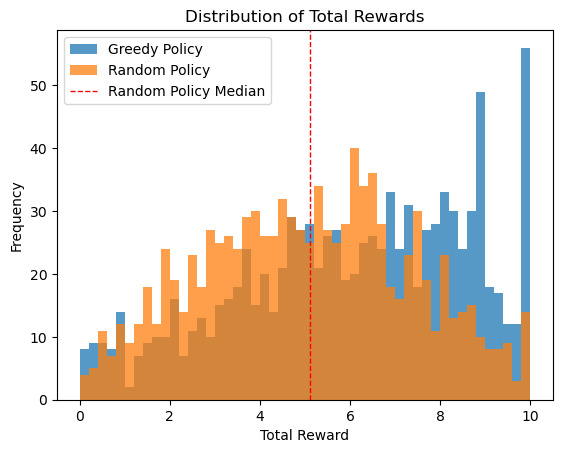

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
gamma = 0.9  # Discount factor
num_simulations = 1000  # Number of simulations to run
num_pulls = 1000  # Number of pulls in each simulation
alpha1, beta1 = 1, 1  # Initial parameters for arm 1
alpha2, beta2 = 1, 1  # Initial parameters for arm 2

# Function to simulate the greedy policy
def simulate_greedy_policy(alpha1, beta1, alpha2, beta2, num_pulls, gamma):
    alpha = [alpha1, alpha2]
    beta = [beta1, beta2]
    total_reward = 0
    
    for t in range(1, num_pulls + 1):
        # Calculate the expected values of theta for each arm
        expected_theta1 = alpha[0] / (alpha[0] + beta[0])
        expected_theta2 = alpha[1] / (alpha[1] + beta[1])
        
        # Select the arm with the highest expected theta
        chosen_arm = 0 if expected_theta1 > expected_theta2 else 1
        
        # Simulate the result of pulling the chosen arm
        success = np.random.rand() < (alpha[chosen_arm] / (alpha[chosen_arm] + beta[chosen_arm]))
        
        # Update the parameters of the chosen arm's Beta distribution
        if success:
            alpha[chosen_arm] += 1
            reward = gamma ** (t - 1)
        else:
            beta[chosen_arm] += 1
            reward = 0
        
        # Accumulate the reward
        total_reward += reward
    
    return total_reward

# Function to simulate the random selection policy
def simulate_random_policy(alpha1, beta1, alpha2, beta2, num_pulls, gamma):
    alpha = [alpha1, alpha2]
    beta = [beta1, beta2]
    total_reward = 0
    
    for t in range(1, num_pulls + 1):
        # Randomly select an arm
        chosen_arm = np.random.choice([0, 1])
        
        # Simulate the result of pulling the chosen arm
        success = np.random.rand() < (alpha[chosen_arm] / (alpha[chosen_arm] + beta[chosen_arm]))
        
        # Update the parameters of the chosen arm's Beta distribution
        if success:
            alpha[chosen_arm] += 1
            reward = gamma ** (t - 1)
        else:
            beta[chosen_arm] += 1
            reward = 0
        
        # Accumulate the reward
        total_reward += reward
    
    return total_reward

# Run the simulations for both policies
greedy_rewards = []
random_rewards = []
for _ in range(num_simulations):
    greedy_rewards.append(simulate_greedy_policy(alpha1, beta1, alpha2, beta2, num_pulls, gamma))
    random_rewards.append(simulate_random_policy(alpha1, beta1, alpha2, beta2, num_pulls, gamma))

# Analyze the results
mean_greedy_reward = np.mean(greedy_rewards)
std_greedy_reward = np.std(greedy_rewards)
mean_random_reward = np.mean(random_rewards)
std_random_reward = np.std(random_rewards)
median_random_reward = np.median(random_rewards)

print(f"Greedy Policy - Mean Total Reward: {mean_greedy_reward}, Std Dev: {std_greedy_reward}")
print(f"Random Policy - Mean Total Reward: {mean_random_reward}, Std Dev: {std_random_reward}")
print(f"Random Policy - Median Total Reward: {median_random_reward}")

# Plot the distribution of rewards
plt.hist(greedy_rewards, bins=50, alpha=0.75, label='Greedy Policy')
plt.hist(random_rewards, bins=50, alpha=0.75, label='Random Policy')
plt.axvline(median_random_reward, color='r', linestyle='dashed', linewidth=1, label='Random Policy Median')
plt.title("Distribution of Total Rewards")
plt.xlabel("Total Reward")
plt.ylabel("Frequency")
plt.legend()
plt.show()


2. this policy might not be optimal
let's suppose this scenerio:
\begin{align}
&\text{define } R_j(\alpha,\beta) : \text{the overall reward of choosing arm j under } Beta(\alpha,\beta)\\
&\alpha_1 = 1 , \beta_1 = 1\\
&\alpha_2 = 10^{100}+1 , \beta_2 = 10^{100}-1\\
&\text{according to the choose larger expectaion policy,}\\&\text{we would choose arm 2 in the first step}\\
&R_2(10^{100}+1,10^{100}-1) = \frac{R_2(10^{100}+1,10^{100})}{2} +  \\
&\frac{\gamma + R_2(10^{100}+2,10^{100}-1)}{2}\\
&= \frac{R_2(10^{100}+1,10^{100})}{2} +\\ &\frac{R_2(10^{100}+1,10^{100}+1) + R_2(10^{100}+2,10^{100}) + \gamma^2 + 2\gamma}{4}\\
&\text{bacause the expectaion of } \theta_1 < \theta_2\\
&\text{however, if we simply choose arm 1}  \text{ in the first step} \\
&\text{and choose arm 2 whenever a failure occur}\\
&R_1(1,1)= \frac{R_2(10^{100}+1,10^{100})}{2}  + \frac{\gamma+ R_1(2,1)}{2} \\ 
&= \frac{R_2(10^{100}+1,10^{100}-1)}{2} +\\& \frac{\frac{1}{2}R_2(10^{100}+1,10^{100-1})+R_1(3,1)+\gamma^2+\frac{3}{4}\gamma}{3}\\
&\text{suppose on the contrary that}\\
&R_2(10^{100}+1,10^{100}-1)> R_1(1,1)\\
&\because R_1(3,1) > R_2(10^{100}+2,10^{100})\\
&\therefore \frac{\gamma^2 + 2\gamma}{4} > \frac{\gamma^2+\frac{3}{4}\gamma}{3}\\
&\therefore \gamma < 0\\
& \text{, which is contradictoy}\\
&\text{indicating chooosing the larger expectation}\\ 
&\text{ is not the optimal policy}
\end{align}

Problem 3:
\begin{align}
&\text{according to the conjunacy of Beta distribution after a bonoulli trial}\\
&\text{the overall reward of pulling arm 1 :} R_1(\alpha_1,\beta_1)\\
&\text{according to LOTP}\\
&= \text{reward in case of winning} * P_{\text{winning}} +  \text{reward in case of losing} * P_{\text{losing}}\\
&\text{Case 1: }\text{the first pulling wins at arm 1}\\
&R_{\text{winning}}^1 = 1 + \gamma(max(R_1^2,R_2^2))\\
&P_{\text{winning}}= \frac{\alpha_1}{\alpha_1+\beta_1}\\
&\text{Case 2: }\text{the first pulling loses at arm 1}\\
&R_{\text{winning}}^1 = \gamma(max(R_1^2,R_2^2))\\
&P_{\text{winning}}= \frac{\beta_1}{\alpha_1+\beta_1}\\
&\text{Case 3: }\text{the first pulling wins at arm 2}\\
&R_{\text{winning}}^1 = 1 + \gamma(max(R_1^2,R_2^2))\\
&P_{\text{winning}}= \frac{\alpha_2}{\alpha_2+\beta_2}\\
&\text{Case 4: }\text{the first pulling loses at arm 2}\\
&R_{\text{winning}}^1 = \gamma(max(R_1^2,R_2^2))\\
&P_{\text{winning}}= \frac{\beta_2}{\alpha_2+\beta_2}
\end{align}

Problem 4:
\begin{align}
\text{Define }&R_1(\alpha_1^n,\beta_1^n): \text{the total largest reward of pulling arm 1 after n pullings}\\
&R_2(\alpha_2^n,\beta_2^n): \text{the total largest reward of pulling arm 2 after n pullings}\\
&\text{let } m = \alpha_1+\beta_1+\alpha_2+\beta_2\\
\text{where }&\alpha_1^n+\beta_1^n+\alpha_2^n+\beta_2^n  = \alpha_1+\beta_1+\alpha_2+\beta_2+n=m+n\\
\text{since } &\gamma < 1\\
&\lim_{n\to \infty}R_1(\alpha_1^n,\beta_1^n) = \lim_{n\to \infty}R_2(\alpha_2^n,\beta_2^n) = 0\\
&\therefore R(\alpha_1^n,\beta_1^n,\alpha_2^n,\beta_2^n) = 0\\
&\therefore R_1(\alpha_1^{n-1},\beta_1^{n-1})= \frac{\alpha_1^{n-1}}{\alpha_1^{n-1}+\beta_1^{n-1}}\\
&\therefore R_2(\alpha_2^{n-1},\beta_2^{n-1})= \frac{\alpha_2^{n-1}}{\alpha_2^{n-1}+\beta_2^{n-1}}\\
\text{so we }&\text{can set n as the starting point of this equation}\\
\text{Case 1: }&\text{the n pulling wins at arm 1}\\
&\because R_1(\alpha_1^n,\beta_1^n) = R_2(\alpha_2^n,\beta_2^n)\\
&\therefore R_1(\alpha_1^{n-1}+1,\beta_1^{n-1}) = R_2(\alpha_2^{n-1},\beta_2^{n-1})\\
&\because R_1(\alpha_1^{n-1}+1,\beta_1^{n-1}) = \frac{\alpha_1^{n-1}+1}{\alpha_1^{n-1}+1+\beta_1^{n-1}} \\
&\therefore \frac{\alpha_1^{n-1}+1}{\alpha_1^{n-1}+1+\beta_1^{n-1}} = \frac{\alpha_2^{n-1}}{\alpha_2^{n-1}+\beta_2^{n-1}}\\
&\therefore \frac{\alpha_1^{n}}{\alpha_1^{n}+\beta_1^{n}} = \frac{\alpha_2^n}{\alpha_2^{n}+\beta_2^{n}};\\
\text{let }&\\
&\frac{\alpha_1^n}{\alpha_2^n} = \frac{\beta_1^n}{\beta_2^n} = k\\
\text{where}&\text{ k is a integer}\\
&\text{in case of n-2}\\
&R_1(\alpha_1^{n-2},\beta_1^{n-2})= \frac{\alpha_1^{n-1}}{\alpha_1^{n-1}+\beta_1^{n-1}}\\
&R_2(\alpha_2^{n-2},\beta_2^{n-2})= \frac{\alpha_2^{n-1}}{\alpha_2^{n-1}+\beta_2^{n-1}}\\
\end{align}
